In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = "../09-Python-Finance-Fundamentals/"

In [3]:
aapl = pd.read_csv(BASE_PATH + 'AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv(BASE_PATH + 'CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv(BASE_PATH + 'IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv(BASE_PATH + 'AMZN_CLOSE', index_col='Date', parse_dates=True)

In [4]:
stock_dfs = (aapl, cisco, ibm, amzn)
stock_names = ['Apple', 'Cisco', 'IBM', 'Amazon']

stocks = pd.concat(stock_dfs, axis=1)
stocks.columns = stock_names

In [5]:
stocks.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [6]:
stocks.pct_change(1).mean()

Apple     0.000750
Cisco     0.000599
IBM       0.000081
Amazon    0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,Apple,Cisco,IBM,Amazon
Apple,1.000000,0.301990,0.297498,0.235487
Cisco,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
Amazon,0.235487,0.284470,0.258492,1.000000


In [8]:
stocks.pct_change(1).head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [9]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


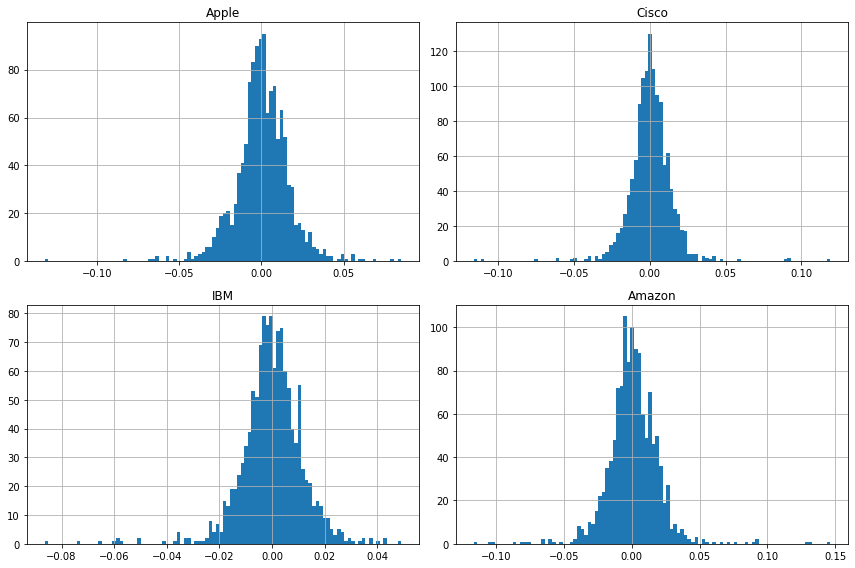

In [10]:
log_ret.hist(bins=100, figsize=(12, 8))
plt.tight_layout();

In [11]:
log_ret.mean()

Apple     0.000614
Cisco     0.000497
IBM       0.000011
Amazon    0.001139
dtype: float64

In [12]:
log_ret.corr()

,Apple,Cisco,IBM,Amazon
Apple,1.000000,0.301328,0.294922,0.236312
Cisco,0.301328,1.000000,0.423915,0.286434
IBM,0.294922,0.423915,1.000000,0.259051
Amazon,0.236312,0.286434,0.259051,1.000000


In [13]:
log_ret.cov() * 252

,Apple,Cisco,IBM,Amazon
Apple,0.068326,0.017854,0.014464,0.018986
Cisco,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
Amazon,0.018986,0.019956,0.014939,0.094470


In [14]:
np.random.seed(101)

print('-' * 50)
print('Stocks')
print(stocks.columns.values)
print('-' * 50)

weights = np.array(np.random.random(4))
print('Random Weights')
print(weights)
print('-' * 50)

weights = weights / np.sum(weights)
print('Rebalanced Weights') 
print(weights)
print('-' * 50)

exp_return = np.sum(log_ret.mean() * weights * 252)
print('Expected Log Return')
print(exp_return)
print('-' * 50)

exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print('Expected Volatility')
print(exp_volatility)
print('-' * 50)

ASR = exp_return/exp_volatility
print('Annual Sharpe Ratio')
print(ASR)
print('-' * 50)

--------------------------------------------------
Stocks
['Apple' 'Cisco' 'IBM' 'Amazon']
--------------------------------------------------
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
--------------------------------------------------
Rebalanced Weights
[0.40122278 0.44338777 0.02212343 0.13326603]
--------------------------------------------------
Expected Log Return
0.15599272049632004
--------------------------------------------------
Expected Volatility
0.18502649565909488
--------------------------------------------------
Annual Sharpe Ratio
0.8430831483926032
--------------------------------------------------


In [15]:
import math
import time
import sys

np.random.seed(101)


n_ports = 5000
zero_fill = math.ceil(math.log(5000, 10))

all_weights = np.zeros((n_ports, len(stocks.columns.values)))
return_arr = np.zeros(n_ports)
volatility_arr = np.zeros(n_ports)
sharpe_arr = np.zeros(n_ports)

for idx in range(n_ports):

    weights = np.array(np.random.random(len(stocks.columns.values)))
    weights = weights / np.sum(weights)
    all_weights[idx, :] = weights
    
    return_arr[idx] = np.sum(log_ret.mean() * weights * 252)

    volatility_arr[idx] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    
    sharpe_arr[idx] = return_arr[idx]/volatility_arr[idx]
    
    print("\r[IN PROGRESS] : ", str(idx).zfill(zero_fill), end="")
    time.sleep(1e-3)

print("\r" + 50 * " ", end="")
print("\r[COMPLETED]: ", str(n_ports).zfill(zero_fill))

[COMPLETED]:  5000                                


In [16]:
sharpe_arr.max()

1.0303260551271067

In [17]:
best_idx = sharpe_arr.argmax()

all_weights[best_idx, :]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [18]:
max_sr_return = return_arr[best_idx]
max_sr_volatility = volatility_arr[best_idx]

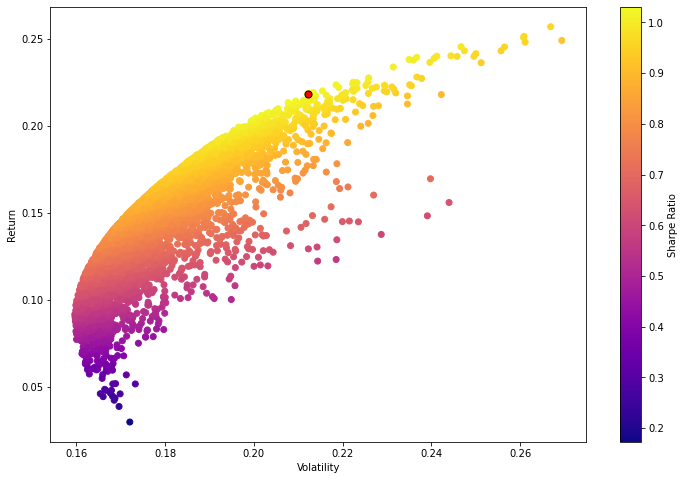

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(volatility_arr, return_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_volatility, max_sr_return, c='red', s=50, edgecolors='black')

In [20]:
def get_data(weights):
    weights = np.array(weights)
    exp_return = np.sum(log_ret.mean() * weights * 252)
    exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe = exp_return / exp_volatility
    
    return np.array([exp_return, exp_volatility, sharpe])

In [21]:
from scipy.optimize import minimize

In [22]:
def neg_sharpe(weights):
    return get_data(weights)[2] * -1

def check_sum(weights):
    return np.sum(weights) - 1

In [23]:
constraints = ({'type': 'eq', 'fun': check_sum})

In [24]:
bounds = tuple([(0,1) for i in stock_names])

In [25]:
init_guess = [round(1 / len(stock_names), 2) for i in stock_names]

In [26]:
opt_results = minimize(fun=neg_sharpe, x0=init_guess, 
                       method='SLSQP', bounds=bounds, constraints=constraints)

In [27]:
best_results = get_data(opt_results.x)

best_sharpe = best_results[2]
print("Best Sharpe Ratio : ", best_sharpe)

Best Sharpe Ratio :  1.0307168703352783


In [28]:
frontier_y = np.linspace(0, 0.3, 100)

def minimize_volatility(weights):
    return get_data(weights)[1]

frontier_volatility = []

for possible_return in frontier_y:
    constraints = ({'type': 'eq', 'fun': check_sum}, 
                   {'type': 'eq', 'fun': lambda w: get_data(w)[0] - possible_return})    
    
    result = minimize(fun=minimize_volatility, x0=init_guess, 
                       method='SLSQP', bounds=bounds, constraints=constraints)
    
    frontier_volatility.append(result['fun'])

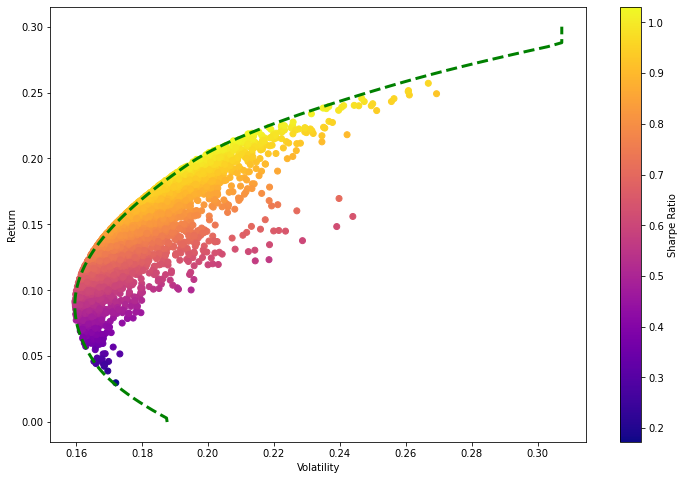

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(volatility_arr, return_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)